In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clusters-data/cluster_2.csv
/kaggle/input/clusters-data/cluster_3.csv
/kaggle/input/clusters-data/cluster_0.csv
/kaggle/input/clusters-data/cluster_1.csv
/kaggle/input/chatgpt-reddit/chatgpt-reddit-comments.csv


In [2]:
data = pd.read_csv('/kaggle/input/chatgpt-reddit/chatgpt-reddit-comments.csv')
data.head()

,Unnamed: 0,comment_id,comment_parent_id,comment_body,subreddit
0,0,iztdxuh,t3_zj2aeu,"I've been shocked for days now, I don't need c...",r/ChatGPT
1,1,iztn0q0,t3_zj2aeu,\n\nI am so angry right now. I just wasted my...,r/ChatGPT
2,2,izudrph,t3_zj2aeu,chatgpt karma whoring is here folks! just when...,r/ChatGPT
3,3,iztfhtb,t3_zj2aeu,"Worked on me, ngl.",r/ChatGPT
4,4,izu2as9,t3_zj2aeu,"Certified 10/10, must-see moment. It really di...",r/ChatGPT


***> Named Entity Recognition using Spacy***

In [3]:
# command to run before code
! pip install spacy
! python -m spacy download en_core_web_sm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
#using spacy
 
# imports and load spacy english language package
import spacy
from spacy import displacy
from spacy import tokenizer
nlp = spacy.load('en_core_web_sm')
 
#Load the text and process it
# I copied the text from python wiki
text =(data['comment_body'][6])
# text2 = # copy the paragraphs from  https://www.python.org/doc/essays/
doc = nlp(text)
#doc2 = nlp(text2)
sentences = list(doc.sents)
#print(sentences)
# tokenization
#for token in doc:
    #print(token.text)
# print entities
ents = [e.label_ for e in doc.ents]
print(ents)
# now we use displaycy function on doc2
#displacy.render(doc, style='ent', jupyter=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

['NORP', 'ORG', 'PERSON', 'NORP', 'NORP', 'NORP']


In [5]:
cluster0 = pd.read_csv('/kaggle/input/clusters-data/cluster_0.csv')
cluster0_sample = cluster0.sample(n = 500)

comments = list(cluster0_sample['comment'])
print(len(comments))
entities0 = []
for comment in comments:
    doc = nlp(comment)
    entities0.append([e.label_ for e in doc.ents])
print(entities0)

500
[[], [], [], ['DATE'], [], [], [], ['DATE'], [], [], [], [], ['GPE', 'DATE'], [], [], [], [], ['ORG'], [], [], [], ['NORP', 'GPE'], [], [], ['DATE'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['ORG'], ['CARDINAL'], [], ['ORDINAL', 'CARDINAL'], [], ['DATE'], [], [], [], [], ['DATE'], [], [], [], [], [], [], [], [], ['CARDINAL'], [], [], [], [], [], ['PERSON'], ['CARDINAL'], ['ORG', 'DATE'], [], [], ['GPE'], [], [], [], [], [], ['DATE'], [], [], ['CARDINAL'], [], [], [], [], [], [], ['DATE'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['CARDINAL'], [], [], [], [], ['CARDINAL'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['NORP'], ['DATE'], [], ['PERSON'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['CARDINAL'], [], [], [], [], [], [], [], ['DATE'], ['ORG'], [], [], [], ['GPE'], [], [], [], [], ['DATE'], ['DATE'], [], ['CARDINAL'], [], [], []

In [6]:
from collections import Counter
entities_set = set()
entities_list0 = [item for row in entities0 for item in row]
#print(entities_list)
entities_set.update(entities_list0)
print(entities_set)
dict_c0 = dict(Counter(entities_list0))

{'LAW', 'DATE', 'CARDINAL', 'ORDINAL', 'GPE', 'NORP', 'TIME', 'PERSON', 'PRODUCT', 'QUANTITY', 'ORG'}


In [7]:
cluster1 = pd.read_csv('/kaggle/input/clusters-data/cluster_1.csv')
cluster1_sample = cluster1.sample(n = 500)

comments = list(cluster1_sample['comment'])
print(len(comments))
entities1 = []
for comment in comments:
    doc = nlp(comment)
    entities1.append([e.label_ for e in doc.ents])
print(entities1)

500
[['GPE'], ['DATE'], ['DATE', 'PERSON'], ['CARDINAL'], [], [], [], ['PERSON', 'DATE', 'DATE'], ['ORG'], ['PERSON'], ['CARDINAL'], [], [], [], [], [], [], ['ORG', 'ORG'], [], [], [], [], ['PERSON'], [], ['PERSON', 'MONEY'], [], ['CARDINAL', 'CARDINAL', 'CARDINAL'], [], [], ['DATE'], [], [], [], [], [], [], [], [], [], [], [], ['ORG', 'CARDINAL'], [], ['ORDINAL'], ['ORG'], ['CARDINAL'], [], ['ORG'], [], [], ['DATE', 'PERSON', 'DATE'], ['DATE'], [], [], ['CARDINAL', 'CARDINAL'], [], [], [], [], [], ['ORG', 'PERSON'], ['DATE'], [], [], [], [], [], ['ORDINAL'], [], ['DATE'], [], ['ORG'], ['DATE', 'DATE'], [], ['DATE'], [], [], [], ['CARDINAL'], [], ['CARDINAL'], [], [], ['GPE', 'DATE'], [], [], [], [], ['PERSON', 'CARDINAL', 'DATE'], [], ['CARDINAL', 'NORP', 'NORP', 'NORP', 'NORP', 'NORP', 'CARDINAL', 'CARDINAL', 'NORP', 'ORG', 'NORP', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'CARDINAL', 'DATE', 'TIME', 'DATE'], ['ORDINAL', 'GPE', 'ORDINAL', 'GPE', 'CARDINAL'], [], [], [], ['CARDI

In [8]:
entities_list1 = [item for row in entities1 for item in row]
#print(entities_list)
entities_set.update(entities_list1)
print(entities_set)
dict_c1 = dict(Counter(entities_list1))

{'LOC', 'LAW', 'LANGUAGE', 'DATE', 'CARDINAL', 'ORDINAL', 'GPE', 'NORP', 'TIME', 'PERSON', 'PRODUCT', 'MONEY', 'QUANTITY', 'FAC', 'ORG'}


In [9]:
cluster2 = pd.read_csv('/kaggle/input/clusters-data/cluster_2.csv')
cluster2_sample = cluster2.sample(n = 500)

comments = list(cluster2_sample['comment'])
print(len(comments))
entities2 = []
for comment in comments:
    doc = nlp(comment)
    entities2.append([e.label_ for e in doc.ents])
print(entities2)

500
[[], ['PERSON'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['CARDINAL'], [], [], [], ['CARDINAL'], [], [], [], ['ORG'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['PERSON'], [], [], [], [], [], [], [], [], ['ORG'], [], [], [], [], [], [], [], [], [], ['ORDINAL'], [], [], [], [], [], [], ['PERSON'], [], [], ['PERSON'], [], ['ORDINAL'], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], ['GPE'], []

In [10]:
entities_list2 = [item for row in entities2 for item in row]
#print(entities_list)
entities_set.update(entities_list2)
print(entities_set)
dict_c2 = dict(Counter(entities_list2))

{'LOC', 'LAW', 'LANGUAGE', 'DATE', 'CARDINAL', 'ORDINAL', 'GPE', 'NORP', 'TIME', 'PERSON', 'PRODUCT', 'MONEY', 'QUANTITY', 'FAC', 'ORG'}


In [11]:
cluster3 = pd.read_csv('/kaggle/input/clusters-data/cluster_3.csv')
cluster3_sample = cluster3.sample(n = 500)

comments = list(cluster3_sample['comment'])
print(len(comments))
entities3 = []
for comment in comments:
    doc = nlp(comment)
    entities3.append([e.label_ for e in doc.ents])
print(entities3)

500
[[], ['GPE'], [], [], [], [], ['PERSON'], ['PERSON'], ['CARDINAL', 'CARDINAL', 'ORG', 'ORG', 'TIME', 'QUANTITY', 'PERSON', 'PERSON', 'CARDINAL'], [], ['ORG'], ['ORG'], [], ['DATE', 'TIME', 'TIME', 'PERSON', 'CARDINAL', 'CARDINAL', 'ORG', 'TIME', 'CARDINAL'], ['ORG'], ['QUANTITY', 'QUANTITY'], [], [], [], ['DATE', 'PRODUCT', 'CARDINAL'], ['ORDINAL'], [], ['GPE'], [], ['PERSON'], ['DATE', 'ORG'], ['CARDINAL', 'ORG', 'CARDINAL'], [], [], [], [], [], [], [], ['ORG'], [], [], [], ['ORG'], [], [], [], [], [], [], [], ['ORG'], [], [], [], [], [], [], [], [], ['ORG', 'CARDINAL', 'CARDINAL'], [], [], [], ['ORG'], ['ORG', 'ORG'], [], [], ['CARDINAL'], ['ORG'], [], [], ['FAC'], ['PERSON', 'ORG'], ['DATE'], ['CARDINAL'], [], [], [], [], ['CARDINAL', 'CARDINAL'], [], ['ORG'], [], [], [], [], ['PERSON', 'PERSON', 'PERSON', 'CARDINAL'], [], ['ORG', 'ORG'], [], ['ORG'], ['PERSON'], ['GPE'], [], [], [], [], [], [], ['ORG'], ['PRODUCT'], ['ORG'], ['CARDINAL', 'CARDINAL'], [], [], [], ['PERSON', 'ORD

In [12]:
entities_list3 = [item for row in entities3 for item in row]
#print(entities_list)
entities_set.update(entities_list3)
print(entities_set)
dict_c3 = dict(Counter(entities_list3))
print(dict_c3)

{'LOC', 'LAW', 'LANGUAGE', 'DATE', 'CARDINAL', 'ORDINAL', 'GPE', 'NORP', 'TIME', 'PERSON', 'PRODUCT', 'MONEY', 'QUANTITY', 'FAC', 'ORG'}
{'GPE': 9, 'PERSON': 43, 'CARDINAL': 88, 'ORG': 97, 'TIME': 5, 'QUANTITY': 4, 'DATE': 33, 'PRODUCT': 2, 'ORDINAL': 9, 'FAC': 2, 'LANGUAGE': 2, 'LAW': 1, 'NORP': 5}


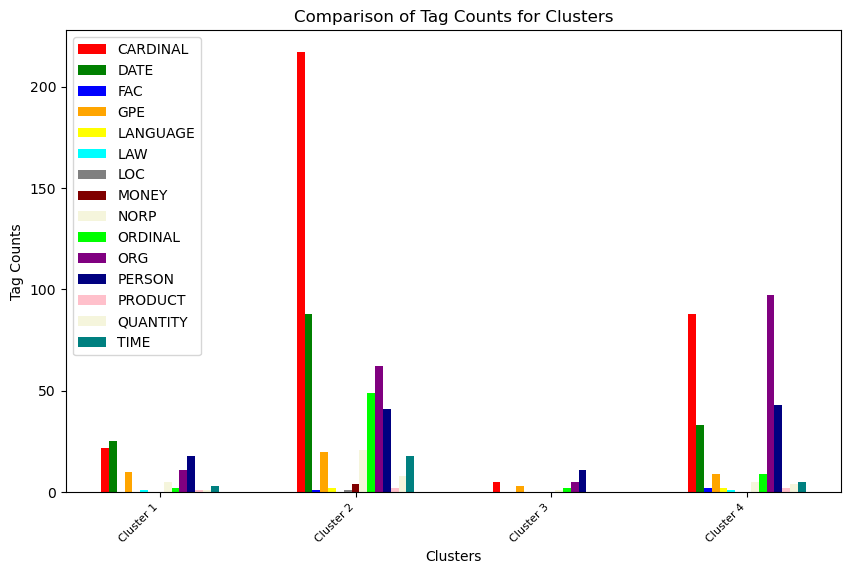

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the clusters
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Tag counts for each cluster
tag_counts = {
    'Cluster 1': dict_c0,
    'Cluster 2': dict_c1,
    'Cluster 3': dict_c2,
    'Cluster 4': dict_c3
}

# Get all unique tags
tags = sorted(set(tag for cluster_tags in tag_counts.values() for tag in cluster_tags.keys()))

# Get the count for each tag in each cluster
counts = [[tag_counts[cluster].get(tag, 0) for tag in tags] for cluster in clusters]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of each bar and the spacing between clusters
bar_width = 0.04
colors = ['red', 'green', 'blue', 'orange', 'yellow', 'cyan', 'gray','maroon',
          'Beige', 'lime', 'purple', 'Navy','Pink', 'Beige', 'Teal', 'Magenta'] 

# Set the positions of the bars on the x-axis
x = np.arange(len(clusters))

# Plot the bars for each tag
for i, tag in enumerate(tags):
    plt.bar(x + i * (bar_width), [count[i] for count in counts], width=bar_width, label=tag, color=colors[i % len(colors)])

# Set the x-axis labels and title
plt.xlabel('Clusters')
plt.ylabel('Tag Counts')
plt.title('Comparison of Tag Counts for Clusters')

# Set the x-axis tick positions and labels with increased boundaries
plt.xticks(x + ((len(tags) - 1) * bar_width) / 2, clusters, fontsize=8, rotation=45, ha='right')

# Add a legend
plt.legend()

# Show the plot
plt.show()

***Named Entity Recognition using NLTK***

In [14]:
! pip install nltk

In [15]:
import nltk
from nltk import word_tokenize, pos_tag

nltk.download('words')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')
text='cannot help thinking chatgpt writing entire thread real time fookin real anymore unreal'
for sent in nltk.sent_tokenize(text):
    for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
        if hasattr(chunk, 'label'):
            print(chunk.label())


[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [16]:
cluster1 = pd.read_csv('/kaggle/input/clusters-data/cluster_1.csv')
cluster1_sample = cluster1.sample(n = 500)

comments = list(cluster1_sample['comment'])
entities_dict1 = {}
for comment in comments:
    #print(comment)
    for sent in nltk.sent_tokenize(comment):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                if chunk.label() in entities_dict1:
                    entities_dict1[chunk.label()] = entities_dict1[chunk.label()] +1
                else:
                    entities_dict1[chunk.label()] = 1

print(entities_dict1)

{}


In [17]:
cluster2 = pd.read_csv('/kaggle/input/clusters-data/cluster_2.csv')
cluster2_sample = cluster2.sample(n = 500)

comments = list(cluster2_sample['comment'])
entities_dict2 = {}
for comment in comments:
    #print(comment)
    for sent in nltk.sent_tokenize(comment):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            #print(chunk)
            if hasattr(chunk, 'label'):
                if chunk.label() in entities_dict2:
                    entities_dict2[chunk.label()] = entities_dict2[chunk.label()] +1
                else:
                    entities_dict2[chunk.label()] = 1

print(entities_dict2)

{}


In [18]:
cluster3 = pd.read_csv('/kaggle/input/clusters-data/cluster_3.csv')
cluster3_sample = cluster3.sample(n = 500)

comments = list(cluster3_sample['comment'])
entities_dict3 = {}
for comment in comments:
    #print(comment)
    for sent in nltk.sent_tokenize(comment):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            #print(chunk)
            if hasattr(chunk, 'label'):
                if chunk.label() in entities_dict3:
                    entities_dict3[chunk.label()] = entities_dict3[chunk.label()] +1
                else:
                    entities_dict3[chunk.label()] = 1

print(entities_dict3)

{}


In [19]:
cluster0 = pd.read_csv('/kaggle/input/clusters-data/cluster_0.csv')
cluster0_sample = cluster0.sample(n = 500)

comments = list(cluster0_sample['comment'])
entities_dict0 = {}
for comment in comments:
    #print(comment)
    for sent in nltk.sent_tokenize(comment):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            #print(chunk)
            if hasattr(chunk, 'label'):
                if chunk.label() in entities_dict0:
                    entities_dict0[chunk.label()] = entities_dict0[chunk.label()] +1
                else:
                    entities_dict0[chunk.label()] = 1

print(entities_dict0)

{}


***Named Entity Recognition using flair***

In [20]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.2/387.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Preparing metadata (setup.py) ... - \ done
  Preparing metadata (setup.py) ... - \ done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993241 sha256=bcb7c3057f1d6695693cffc9a5a78d42234976a09cae789e20125b02ca4af71f
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
  Created wheel for pptree: filename=pptree-3.1-py3-none-any.whl size=4629 sha256=3fabca8e73504c66ed1ed4279bc129dc6a2529c6046589deb4cd83a593e24363
  Stored in directory: /root/.cache/pip/wheels/9f/b6/0e/6f26eb9e6eb53ff2107a7888d72b5a6a597593956113037828
  Created wheel for sqlitedict: filename=sqlitedict-2.1.0-py3-none-any.whl size=16868 sha25

In [21]:
# using flair

from flair.data import Sentence
from flair.models import SequenceTagger
from segtok.segmenter import split_single
tagger = SequenceTagger.load('ner-ontonotes')


2023-12-15 14:46:48,252 SequenceTagger predicts: Dictionary with 75 tags: O, S-PERSON, B-PERSON, E-PERSON, I-PERSON, S-GPE, B-GPE, E-GPE, I-GPE, S-ORG, B-ORG, E-ORG, I-ORG, S-DATE, B-DATE, E-DATE, I-DATE, S-CARDINAL, B-CARDINAL, E-CARDINAL, I-CARDINAL, S-NORP, B-NORP, E-NORP, I-NORP, S-MONEY, B-MONEY, E-MONEY, I-MONEY, S-PERCENT, B-PERCENT, E-PERCENT, I-PERCENT, S-ORDINAL, B-ORDINAL, E-ORDINAL, I-ORDINAL, S-LOC, B-LOC, E-LOC, I-LOC, S-TIME, B-TIME, E-TIME, I-TIME, S-WORK_OF_ART, B-WORK_OF_ART, E-WORK_OF_ART, I-WORK_OF_ART, S-FAC


In [22]:
cluster0 = pd.read_csv('/kaggle/input/clusters-data/cluster_0.csv')
cluster0_sample = cluster0.sample(n = 500)

comments = list(cluster0_sample['comment'])
entities_dict0 = {}
for comment in comments:
    #print(comment)
    sentence = [Sentence(sent, use_tokenizer=True) for sent in split_single(comment)]
    tagger.predict(sentence)
    for sent in sentence:
        for entity in sent.get_spans('ner'):
            if entity.tag in entities_dict0:
                entities_dict0[entity.tag] = entities_dict0[entity.tag] +1
            else:
                entities_dict0[entity.tag] = 1
print(entities_dict0)


{'CARDINAL': 16, 'PERSON': 8, 'MONEY': 2, 'NORP': 1, 'DATE': 12, 'ORG': 2, 'GPE': 1}


In [23]:
cluster1 = pd.read_csv('/kaggle/input/clusters-data/cluster_1.csv')
cluster1_sample = cluster1.sample(n = 500)

comments = list(cluster1_sample['comment'])
entities_dict1 = {}
i=0
for comment in comments:
    print(i)
    i = i+1
    #print(comment)
    sentence = [Sentence(sent, use_tokenizer=True) for sent in split_single(comment)]
    tagger.predict(sentence)
    for sent in sentence:
        for entity in sent.get_spans('ner'):
            print(entity.tag)
            if entity.tag in entities_dict1:
                entities_dict1[entity.tag] = entities_dict1[entity.tag] +1
            else:
                entities_dict1[entity.tag] = 1
print(entities_dict1)


0
CARDINAL
1
2
3
4
5
6
7
8
9
10
DATE
DATE
11
12
GPE
13
14
15
16
17
CARDINAL
18
19
20
PERSON
21
DATE
22
DATE
23
24
25
26
27
28
29
30
31
32
PERSON
33
34
35
36
CARDINAL
CARDINAL
CARDINAL
37
38
39
40
41
42
43
ORDINAL
CARDINAL
44
45
46
DATE
47
48
49
50
51
52
CARDINAL
53
54
55
56
57
58
59
60
61
62
63
CARDINAL
CARDINAL
CARDINAL
CARDINAL
64
65
66
67
CARDINAL
NORP
CARDINAL
CARDINAL
CARDINAL
68
CARDINAL
69
ORDINAL
CARDINAL
ORDINAL
CARDINAL
70
71
72
73
74
75
GPE
NORP
76
77
78
79
80
81
CARDINAL
82
CARDINAL
CARDINAL
TIME
83
CARDINAL
84
85
TIME
86
87
88
89
90
91
92
93
94
95
CARDINAL
CARDINAL
96
TIME
97
CARDINAL
ORDINAL
ORDINAL
CARDINAL
CARDINAL
98
99
100
101
CARDINAL
DATE
DATE
CARDINAL
DATE
102
103
104
105
106
CARDINAL
107
108
109
110
111
CARDINAL
DATE
112
113
114
115
116
117
118
119
120
121
ORDINAL
CARDINAL
CARDINAL
122
ORDINAL
CARDINAL
ORDINAL
DATE
CARDINAL
123
DATE
124
DATE
125
DATE
126
127
128
ORDINAL
129
130
131
132
ORDINAL
CARDINAL
133
PERSON
134
135
CARDINAL
DATE
136
137
138
139
140
141
NORP


In [24]:
cluster2 = pd.read_csv('/kaggle/input/clusters-data/cluster_2.csv')
cluster2_sample = cluster2.sample(n = 500)

comments = list(cluster2_sample['comment'])
entities_dict2 = {}
i=0
for comment in comments:
    #print(i)
    i = i+1
    #print(comment)
    sentence = [Sentence(sent, use_tokenizer=True) for sent in split_single(comment)]
    tagger.predict(sentence)
    for sent in sentence:
        for entity in sent.get_spans('ner'):
            print(entity.tag)
            if entity.tag in entities_dict2:
                entities_dict2[entity.tag] = entities_dict2[entity.tag] +1
            else:
                entities_dict2[entity.tag] = 1
print(entities_dict2)


PERSON
GPE
GPE
DATE
DATE
GPE
PERSON
NORP
CARDINAL
PERSON
PERSON
{'PERSON': 4, 'GPE': 3, 'DATE': 2, 'NORP': 1, 'CARDINAL': 1}


In [25]:
cluster3 = pd.read_csv('/kaggle/input/clusters-data/cluster_3.csv')
cluster3_sample = cluster3.sample(n = 500)

comments = list(cluster3_sample['comment'])
entities_dict3 = {}
i=0
for comment in comments:
    #print(i)
    i = i+1
    #print(comment)
    sentence = [Sentence(sent, use_tokenizer=True) for sent in split_single(comment)]
    tagger.predict(sentence)
    for sent in sentence:
        for entity in sent.get_spans('ner'):
            print(entity.tag)
            if entity.tag in entities_dict3:
                entities_dict3[entity.tag] = entities_dict3[entity.tag] +1
            else:
                entities_dict3[entity.tag] = 1
print(entities_dict3)


CARDINAL
DATE
PERSON
ORDINAL
MONEY
DATE
CARDINAL
GPE
GPE
GPE
CARDINAL
CARDINAL
CARDINAL
PERSON
PERSON
CARDINAL
CARDINAL
PERSON
PERSON
ORG
ORG
DATE
QUANTITY
CARDINAL
ORG
CARDINAL
ORG
QUANTITY
DATE
DATE
DATE
CARDINAL
CARDINAL
DATE
CARDINAL
DATE
DATE
ORDINAL
CARDINAL
ORDINAL
ORDINAL
DATE
CARDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
QUANTITY
CARDINAL
TIME
TIME
CARDINAL
CARDINAL
CARDINAL
CARDINAL
DATE
CARDINAL
CARDINAL
CARDINAL
CARDINAL
ORDINAL
CARDINAL
CARDINAL
CARDINAL
MONEY
ORDINAL
ORG
CARDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
ORG
ORG
CARDINAL
DATE
CARDINAL
NORP
NORP
ORDINAL
DATE
ORG
DATE
CARDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
CARDINAL
{'CARDINAL': 47, 'DATE': 14, 'PERSON': 5, 'ORDINAL': 7, 'MONEY': 2, 'GPE': 3, 'ORG': 8, 'QUANTITY': 3, 'TIME': 2, 'NORP': 2}


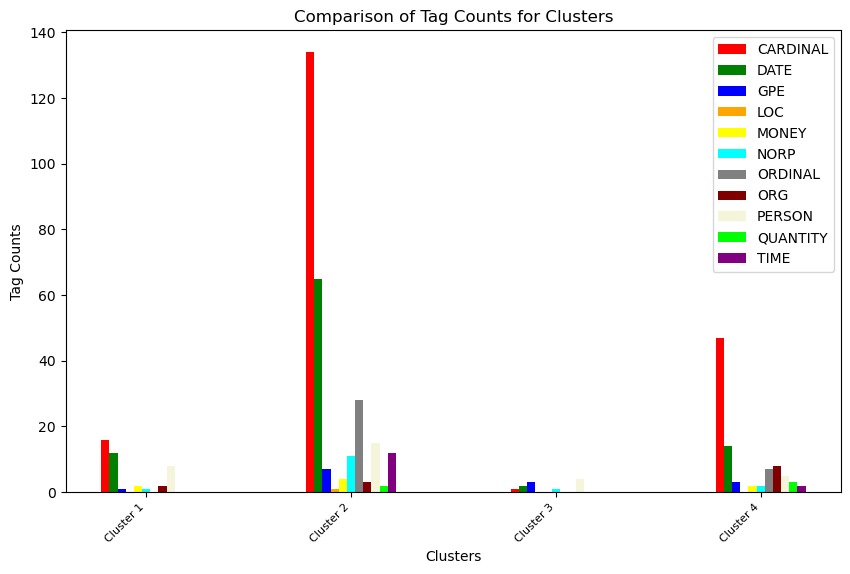

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the clusters
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Tag counts for each cluster
tag_counts = {
    'Cluster 1': entities_dict0,
    'Cluster 2': entities_dict1,
    'Cluster 3': entities_dict2,
    'Cluster 4': entities_dict3
}

# Get all unique tags
tags = sorted(set(tag for cluster_tags in tag_counts.values() for tag in cluster_tags.keys()))

# Get the count for each tag in each cluster
counts = [[tag_counts[cluster].get(tag, 0) for tag in tags] for cluster in clusters]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set the width of each bar and the spacing between clusters
bar_width = 0.04
colors = ['red', 'green', 'blue', 'orange', 'yellow', 'cyan', 'gray','maroon',
          'Beige', 'lime', 'purple', 'Navy','Pink', 'Beige', 'Teal', 'Magenta'] 

# Set the positions of the bars on the x-axis
x = np.arange(len(clusters))

# Plot the bars for each tag
for i, tag in enumerate(tags):
    plt.bar(x + i * (bar_width), [count[i] for count in counts], width=bar_width, label=tag, color=colors[i % len(colors)])

# Set the x-axis labels and title
plt.xlabel('Clusters')
plt.ylabel('Tag Counts')
plt.title('Comparison of Tag Counts for Clusters')

# Set the x-axis tick positions and labels with increased boundaries
plt.xticks(x + ((len(tags) - 1) * bar_width) / 2, clusters, fontsize=8, rotation=45, ha='right')

# Add a legend
plt.legend()

# Show the plot
plt.show()